In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using DSP
using HDF5
using Random123

In [2]:
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT

In [3]:
SMALL_SIZE = 10
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

In [4]:
include("../model-41/likelihood.jl")
include("../model-41/utill_model.jl")
include("../utill.jl")

plot_projections_prl (generic function with 1 method)

In [5]:
conv_mat = load("../../data/experiment/dataset_2/m2/conv-matrix-upd-2.jld2")

conv_matrices = (
    cam_1 = conv_mat["cam_1"],
    cam_2 = conv_mat["cam_2"],
    cam_3 = conv_mat["cam_3"],
    cam_4 = conv_mat["cam_4"],
);


In [6]:
param_truth = (
    tr_size = [0.15, 0.15], 
    tr_size_2 = [0.10, 0.10], 
    ang_spr = [6, 6], 
    ang_spr_2 = [3, 3], 
    mixt_pow = 0.7, 
    waist = [3.15], 
    waist_2 = [2.9], 
    algmx = [36.0, 37.0, 19.0, 33.0], 
    algmy = [33.0, 34.0, 21.0, 35.0], 
    cam4_ped = 26.0, 
    cam4_light_fluct = 1.50, 
    cam4_light_amp = 8.90, 
    resx = [1, 1, 1], 
    resy = [1, 1, 1], 
    cam4_resx = 3.0, 
    cam4_resy = 3.0, 
    psx = [27.1, 21.6, 114.0], 
    psy = [30.5, 23.4, 125.0], 
    cam4_psx = 121.8, 
    cam4_psy = 120.0, 
    light_amp = [8.5, 11.1, 2.5], 
    s_cam = [0.0, 1.478, 15.026, 23.115]
);

In [7]:
# event = generate_event(param_truth, 27.0, conv_matrices)

@load "../../data/sampling_results/Benchmark-6/event-41.jld" event

1-element Vector{Symbol}:
 :event

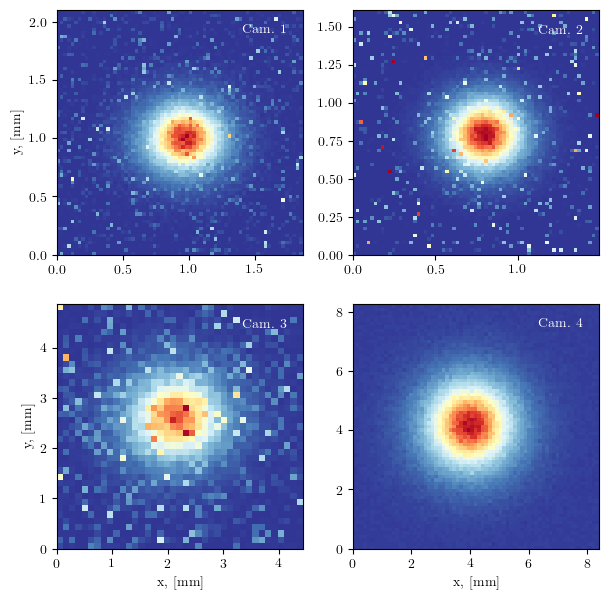

PyObject Text(0.5, 23.83700013837001, 'x, [mm]')

In [8]:
fig, ax = plt.subplots(2,2, figsize=(7,7))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

ax[1,1].pcolormesh(range(0, length = 70, step=param_truth.psx[1]*10^-3), range(0, length = 70, step=param_truth.psy[1]*10^-3), event.cam_1, cmap="RdYlBu_r")
ax[1,2].pcolormesh(range(0, length = 70, step=param_truth.psx[2]*10^-3), range(0, length = 70, step=param_truth.psy[2]*10^-3), event.cam_2, cmap="RdYlBu_r")
ax[2,1].pcolormesh(range(0, length = 40, step=param_truth.psx[3]*10^-3), range(0, length = 40, step=param_truth.psy[3]*10^-3), event.cam_3, cmap="RdYlBu_r")
ax[2,2].pcolormesh(range(0, length = 70, step=param_truth.cam4_psx*10^-3), range(0, length = 70, step=param_truth.cam4_psy*10^-3), event.cam_4, cmap="RdYlBu_r")

ax[1,1].text(0.75,0.9,"Cam. 1", transform=ax[1].transAxes, color="white", )
ax[1,2].text(0.75,0.9,"Cam. 2", transform=ax[1,2].transAxes, color="white",)
ax[2,1].text(0.75,0.9,"Cam. 3", transform=ax[2,1].transAxes, color="white",)
ax[2,2].text(0.75,0.9,"Cam. 4", transform=ax[2,2].transAxes, color="white",)

ax[1,1].set_ylabel("y, [mm]")
ax[2,1].set_ylabel("y, [mm]")

ax[2,1].set_xlabel("x, [mm]")
ax[2,2].set_xlabel("x, [mm]")

In [9]:
# @save "../../data/sampling_results/Benchmark-6/event-41.jld" event

In [10]:
β1= 0.015
β2 = 0.0077
β3 = 0.0058 

# prior = NamedTupleDist(
#         tr_size = [truncated(Normal(0.145, 0.04), 0.06, 0.19), truncated(Normal(0.145, 0.04), 0.06, 0.19)],
#         tr_size_2 = [truncated(Normal(0.145, 0.04), 0.06, 0.19), truncated(Normal(0.145, 0.04), 0.06, 0.19)],
#         ang_spr = [truncated(Normal(6, 2.0), 4.0, 7.0), truncated(Normal(6.0, 2.0), 4.0, 7.0)],
#         ang_spr_2 = [truncated(Normal(3.0, 2.0), 1.0, 4.0), truncated(Normal(3.0, 2.0), 1.0, 4.0)],
#         mixt_pow =  0.50 .. 1.0 ,
#         waist = [truncated(Normal(3.15, 0.03), 2.65, 3.5)],
#         waist_2 = [truncated(Normal(2.9, 0.03), 2.65, 3.5)], # 11
#         algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
#         algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
#         cam4_ped = 4.0 .. 40.0,
#         cam4_light_fluct = 1.0 .. 3.0,
#         cam4_light_amp = 1.6 .. 9.9, 
#         resx = [1, 1, 1], # 23, 24, 25, 
#         resy = [1, 1, 1], # 26,27, 28, 
#         cam4_resx = truncated(Normal(3, 1.5), 0, Inf),
#         cam4_resy = truncated(Normal(3, 1.5), 0, Inf), 
#         psx = [27.1, 21.6, 114.0], # 31, 32, 33
#         psy = [30.5, 23.4, 125.0], # 34, 35, 36
#         cam4_psx = 121.8, # 37
#         cam4_psy = 120.0, # 38
#         light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
#         s_cam = [0.0, 1.478, 15.026, 23.1150],
#     );

prior = NamedTupleDist(
        tr_size = [0.13 .. 0.17, 0.13 .. 0.17],
        tr_size_2 = [0.08 .. 0.11, 0.08 .. 0.11],
        ang_spr = [5 .. 7, 5 .. 7],
        ang_spr_2 = [2 .. 4, 2 .. 4],
        mixt_pow =  0.60 .. 1.0 ,
        waist = [2.8 .. 3.3],
        waist_2 = [2.8 .. 3.3], # 11
        algmx = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        algmy = [23.0 .. 48, 23.0 .. 48.0, 10.0 .. 30.0, 23.0 .. 48.0],
        cam4_ped = 4.0 .. 40.0,
        cam4_light_fluct = 1.0 .. 3.0,
        cam4_light_amp = 1.6 .. 9.9,
        resx = [1, 1, 1], 
        resy = [1, 1, 1], 
        cam4_resx = 2.0 .. 4.00, 
        cam4_resy = 2.0 .. 4.00, 
        psx = [27.1, 21.6, 114.0], 
        psy = [30.5, 23.4, 125.0], 
        cam4_psx = 121.8, 
        cam4_psy = 120.0, 
        light_amp  = [1.0 .. 13.0 , 1.0 .. 17.0, 1.0 .. 5.0], # 1.0 .. 5.0
        s_cam = [0.0, 1.478, 15.026, 23.115]
    );

In [11]:
"""
    Log-Likelihood of the beamline (4 cameras included)
"""
function log_lik_ndiff(;  
    e = event,
    cv_mat = conv_matrices,
    func = conv_tabl_discrete,
    cv_1 = cv_mat.cam_1,
    cv_2 = cv_mat.cam_2,
    cv_3 = cv_mat.cam_3,
    n_threads = Threads.nthreads(),
    )
    
    return params -> begin 
        ll = 0.0
        ll += likelihood_cam13(params, e.cam_1, e.population, cv_1, func, 1, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_2, e.population, cv_2, func, 2, n_threads=n_threads)
        ll += likelihood_cam13(params, e.cam_3, e.population, cv_3, func, 3, n_threads=n_threads)
        ll += likelihood_cam4(params, e.cam_4, e.population, 4, n_threads=n_threads)
        return LogDVal(ll)
    end
        
end

log_likelihood = log_lik_ndiff()

#82 (generic function with 1 method)

In [12]:
posterior = PosteriorDensity(log_likelihood, prior)

tuning = AdaptiveMHTuning(
    λ = 0.5,
    α = ClosedInterval(0.15,0.25),
    β = 1.5,
    c = ClosedInterval(1e-4,1e2),
    r = 0.5,
)

mcmcalgo = MetropolisHastings(
    weighting = RepetitionWeighting(),
    tuning = tuning
)

rng = Philox4x()

init = MCMCChainPoolInit(
    init_tries_per_chain = 50 .. 150,
    nsteps_init = 1500
)

burnin = MCMCMultiCycleBurnin(
    max_ncycles = 160,
    nsteps_per_cycle = 40000
)

nsamples = 5*10^5
nchains = 4

convergence = BrooksGelmanConvergence(threshold=1.15);

In [13]:
# @time samples_tot = bat_sample(
#     posterior, nchains*nsamples, algorithm,
#     max_neval = nchains*nsamples,
#     max_time = Inf,
# );

# samples = samples_tot.result;

In [14]:
samples = bat_read("../../data/sampling_results/Benchmark-6/samples-41.hdf5").result
samples = varshape(prior).(samples);

In [15]:
minimum(bat_eff_sample_size(unshaped.(samples)).result)

894.856710231657

In [16]:
size(flatview(unshaped.(samples.v)))

(27, 88501)

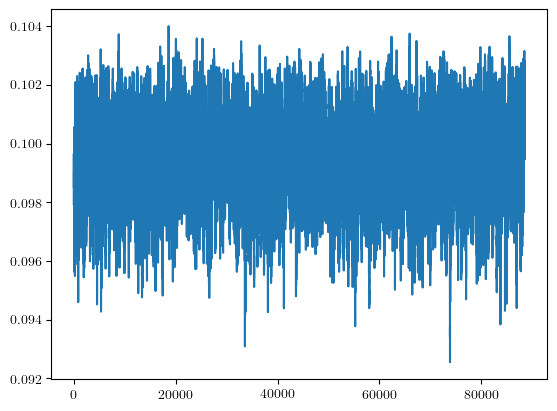

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f955e352d60>

In [17]:
plot(flatview(unshaped.(samples.v))[3,:])

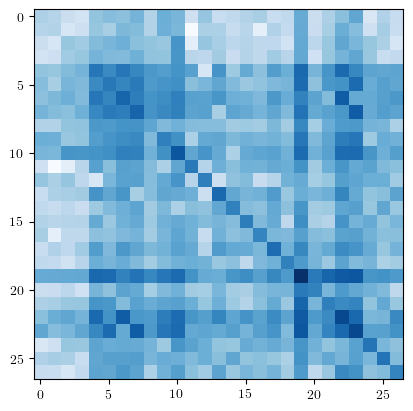

PyObject <matplotlib.image.AxesImage object at 0x7f955e3333d0>

In [18]:
plt.imshow(log.(abs.(cov(flatview(unshaped.(samples.v))'))), cmap="Blues")

In [ ]:
# BAT.bat_write("../../data/sampling_results/Benchmark-6/samples-41.hdf5", unshaped.(samples))

In [19]:
flat_truth = vcat([i for i in param_truth]...)
flat_mode = vcat([i for i in mode(samples)[1]]...) ./flat_truth
flat_std = vcat([i for i in std(samples)[1]]...)./flat_truth;

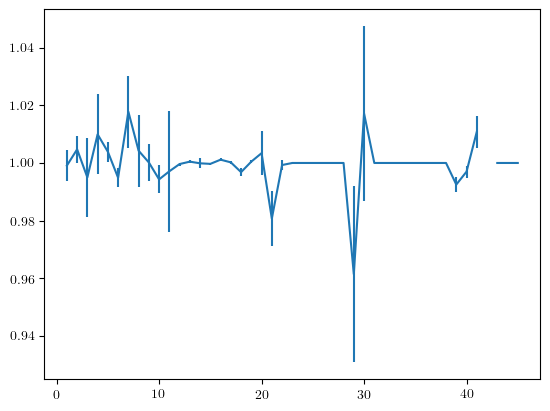

(PyObject <matplotlib.lines.Line2D object at 0x7f955e2930d0>, (), (PyObject <matplotlib.collections.LineCollection object at 0x7f955e293460>,))

In [20]:
plt.errorbar(1:length(flat_mode), flat_mode, yerr=flat_std )

In [21]:
bat_marginalmode(samples).result

ShapedAsNT((tr_size = [0.150025, 0.150475], tr_size_2 = [0.09975, 0.09955], ang_spr = [6.0075, 5.9615], ang_spr_2 = [3.029, 3.021], mixt_pow = 0.7041, waist = [3.1304999999999996], waist_2 = [2.909], algmx = [35.9905, 37.0265, 18.985, 32.9985], algmy = [33.0355, 34.00475, 20.9525, 35.0115], cam4_ped = 26.064999999999998, cam4_light_fluct = 1.4655, cam4_light_amp = 8.8945, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 2.9275, cam4_resy = 3.0625, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.4505, 11.0775, 2.5244999999999997], s_cam = [0.0, 1.478, 15.026, 23.115]))

In [22]:
mean(samples)[1]

(tr_size = [0.15006898898044804, 0.15059533251646168], tr_size_2 = [0.09946768548886759, 0.09907678230380952], ang_spr = [6.007336300791279, 5.959669905569269], ang_spr_2 = [3.0189641210692564, 3.017227858371692], mixt_pow = 0.7029656661523059, waist = [3.1314088074911735], waist_2 = [2.919219837006495], algmx = [35.99473677295949, 37.02078919346534, 18.98599620100874, 32.996626494406534], algmy = [33.02995586541834, 34.00463179478018, 20.957961403123342, 35.008058113964495], cam4_ped = 26.04375438049041, cam4_light_fluct = 1.4670129533531093, cam4_light_amp = 8.891721825477694, resx = [1, 1, 1], resy = [1, 1, 1], cam4_resx = 2.9329461649588224, cam4_resy = 3.0437644804149846, psx = [27.1, 21.6, 114.0], psy = [30.5, 23.4, 125.0], cam4_psx = 121.8, cam4_psy = 120.0, light_amp = [8.449766508580687, 11.079835822597966, 2.5216736185005106], s_cam = [0.0, 1.478, 15.026, 23.115])

In [23]:
std(samples)[1]

(tr_size = [0.0007869405272247409, 0.000717726081819865], tr_size_2 = [0.0013803319787626784, 0.0013939453112598635], ang_spr = [0.02085795866422437, 0.01995535290902077], ang_spr_2 = [0.03746479666775958, 0.0375297730764657], mixt_pow = 0.004503540032856832, waist = [0.015303717715671648], waist_2 = [0.06085503762918901], algmx = [0.019360691136769838, 0.015802298710649986, 0.03217385603899115, 0.015258693338157497], algmy = [0.016889616803947523, 0.013680884095856511, 0.028203953385063023, 0.015242118374764912], cam4_ped = 0.1970824332118837, cam4_light_fluct = 0.014447416271934995, cam4_light_amp = 0.016151027134642077, resx = 3-element Fill{Int64}: entries equal to 0, resy = 3-element Fill{Int64}: entries equal to 0, cam4_resx = 0.09169954585028714, cam4_resy = 0.09096252655863311, psx = 3-element Fill{Float64}: entries equal to 0.0, psy = 3-element Fill{Float64}: entries equal to 0.0, cam4_psx = 0.0, cam4_psy = 0.0, light_amp = [0.022474605346756115, 0.023410181604930014, 0.013883

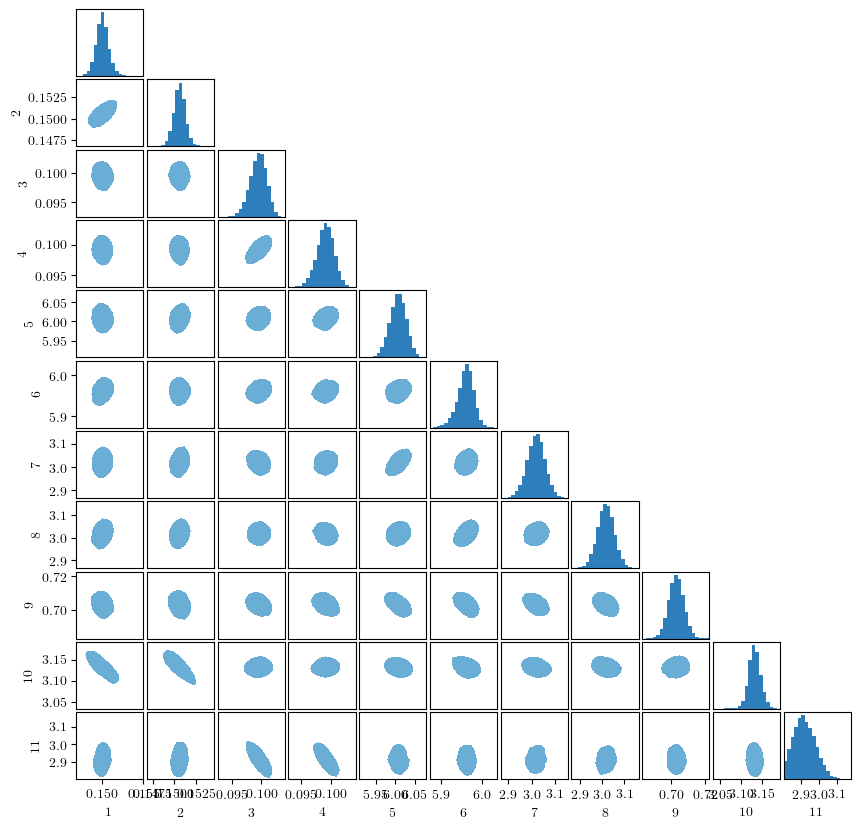

In [24]:
dims = [1,2,3,4,5,6,7,8,9,10,11]
# dims = [1,2,3,4,5,]
names = [1,2,3,4,5,6,7,8,9,10, 11]
# levels = [0.01, 0.55, 0.9, 0.95,  1,]
levels = [0.001, 0.90, 1,]
figsize = (10,10)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

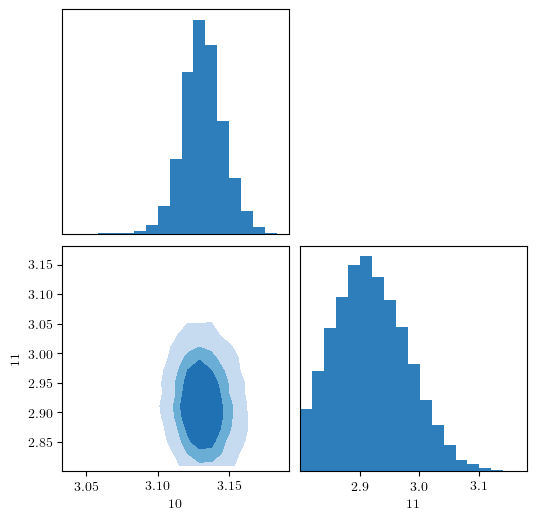

In [25]:
dims = [10,11,]
names = [10,11,]
levels = [0.1, 0.8, 0.9, 0.95,  1,]
figsize = (6,6)
n_bins = 20

corner_plots(samples, dims, names, levels_quantiles = levels, figsize=figsize, N_bins=n_bins)

In [26]:
data = [sort(randn(500)) for i in 1:5];
quant = [(0.1, 0.9) for i in 1:5]

5-element Vector{Tuple{Float64, Float64}}:
 (0.1, 0.9)
 (0.1, 0.9)
 (0.1, 0.9)
 (0.1, 0.9)
 (0.1, 0.9)

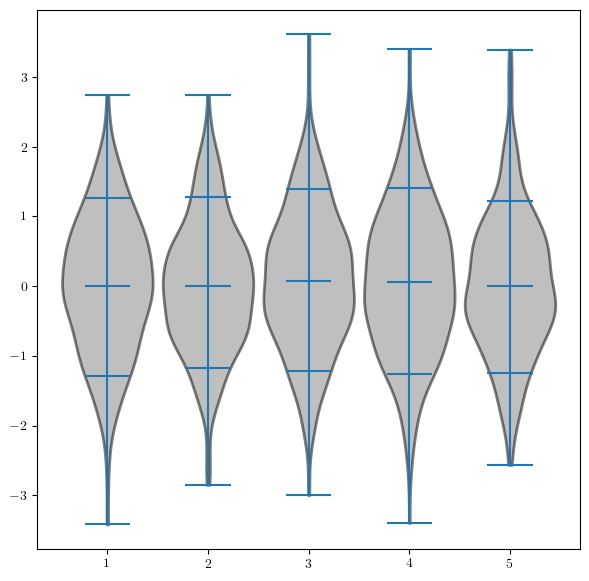

In [27]:
fig, ax = plt.subplots(1,1, figsize=(7,7))

parts = ax.violinplot(data, widths = 0.9, vert=true, showmeans=true, showextrema=true, quantiles=quant)

for pc in parts["bodies"]
    pc.set_facecolor("gray")
    pc.set_edgecolor("black")
    pc.set_alpha(0.5)
    pc.set_linewidth(2)
end

In [28]:
labels = [L"\sigma_x", L"\sigma_y", L"\sigma_x", L"\sigma_y",  L"\sigma'_x", L"\sigma'_y", L"\sigma'_x", L"\sigma'_y", L"\alpha", L"s_1", L"s_2",
    L"\mu_{x1}", L"\mu_{x2}", L"\mu_{x3}", L"\mu_{x4}", L"\mu_{y1}", L"\mu_{y2}", L"\mu_{y3}", L"\mu_{y4}", 
    "ped", L"\alpha", L"I_4", L"\Delta_x", L"\Delta_y", L"I_1", L"I_2", L"I_3"];

In [29]:
labels = [
    L"\sigma_{c,x}", 
    L"\sigma_{c,y}", 
    L"\sigma_{h,x}", 
    L"\sigma_{h,y}", 
    L"\sigma'_{c,x}", 
    L"\sigma'_{c,y}", 
    L"\sigma'_{h,x}", 
    L"\sigma'_{h,y}", 
    L"\alpha",
    L"s_{w,c}",
    L"s_{w,h}",
    L"\mu_{1,x}", 
    L"\mu_{2,x}",
    L"\mu_{3,x}", 
    L"\mu_{4,x}",
    L"\mu_{1,y}", 
    L"\mu_{2,y}",
    L"\mu_{3,y}", 
    L"\mu_{4,y}",
    L"p_4", 
    L"f_4", 
    L"i_4", 
    L"\tilde{\sigma}_{4,x}", 
    L"\tilde{\sigma}_{4,y}",
    L"i_1", 
    L"i_2", 
    L"i_3"
];

ind_sorted = [3,4,1,2,7,8,5,6,9,11,10,12,13,14,15,16,17,18,18,20,21,22,23,24,25,26,27,];

In [30]:
samples_uw = bat_sample(samples, OrderedResampling(nsamples=10^4)).result;

┌ Info: Initializing new RNG of type Philox4x{UInt64, 10}
└ @ BAT /user/.julia/packages/BAT/8MnfJ/src/algotypes/bat_default.jl:44


In [31]:
truth = [0.15, 0.15, 0.10, 0.10, 6.0, 6.0, 3.0, 3.0, 0.7, 3.15, 2.9, 36.0, 37.0, 19.0, 33.0, 33.0, 34.0, 21.0, 35.0, 26.0, 1.5, 8.9, 3, 3, 8.5, 11.1, 2.5];

In [32]:
samples_flat = flatview(unshaped.(samples_uw.v)) ./ truth;

In [33]:
data = [i for i in eachrow(samples_flat)];
quant = [(0.01, 0.99) for i in eachrow(samples_flat)];

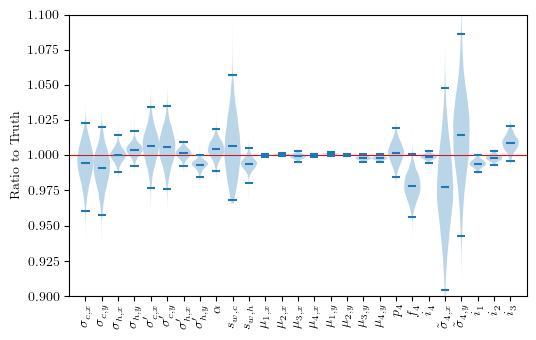

In [34]:
fig, ax = plt.subplots(1,1, figsize=(5.905631659056317, 3.649881090334235))

ax.axhline(1.0, linestyle="-", lw=0.8, color="red", alpha=1.0, zorder=0, label="Truth")

parts = ax.violinplot(data[ind_sorted], widths = 1.0, vert=true, showmeans=true, showextrema=false, quantiles=quant[ind_sorted])

# for pc in parts["bodies"]
#     pc.set_facecolor("gray")
#     pc.set_edgecolor("black")
#     pc.set_alpha(0.5)
#     pc.set_linewidth(2)
# end

ax.set_xlim(0.0, length(data)+1)

ax.set_xticks(collect(Base.OneTo(length(data))))
ax.set_xticklabels(labels, rotation = 90, ha="center")
# ax.legend(loc="upper left")
ax.set_ylabel("Ratio to Truth")

ax.set_ylim(0.9, 1.1)

fig.savefig("../../plots/toy-violin-2.pdf", bbox_inches = "tight")

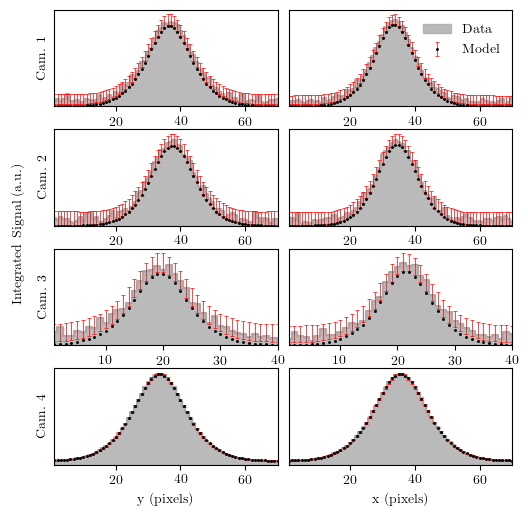

sys:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


In [35]:
plot_projections(conv_matrices, event, event, mean(samples)[1], 
    isnontr = true, 
    figsize=(5.905631659056317, 5.905631659056317),
    saveplot = true,
    filename = "../../plots/toy_proj-2.pdf"
)

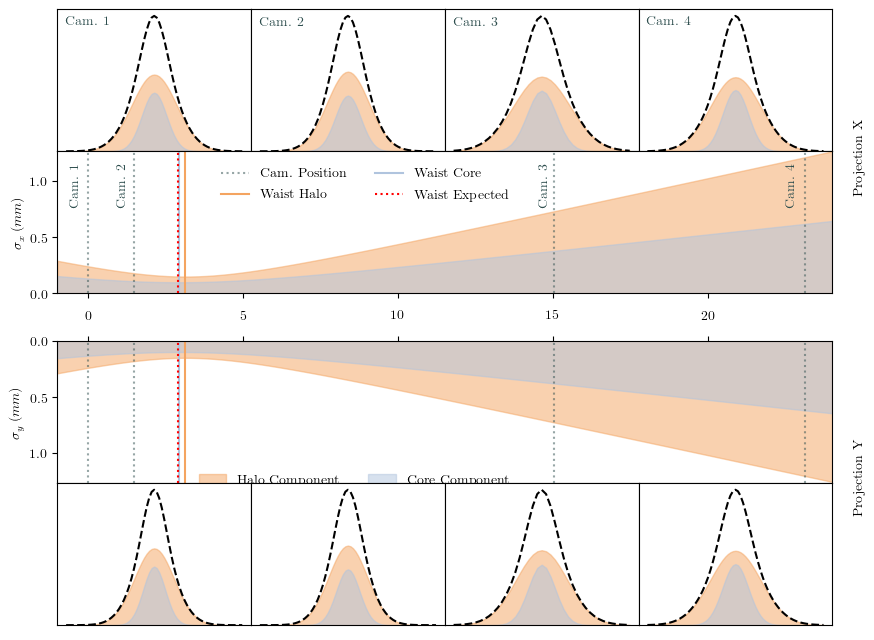

(0.0, 0.05357078402196513)

In [36]:
plot_signal_envelope(mean(samples)[1])

### PRL:

In [37]:
SMALL_SIZE = 7
MEDIUM_SIZE = 8
BIGGER_SIZE = 9

# plt.rc("font", family="serif",) #serif="Times"
# plt.rc("font", family= "Times New Roman")
plt.rc("font", family="serif", serif="Computer Modern")
plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("text", usetex=true)

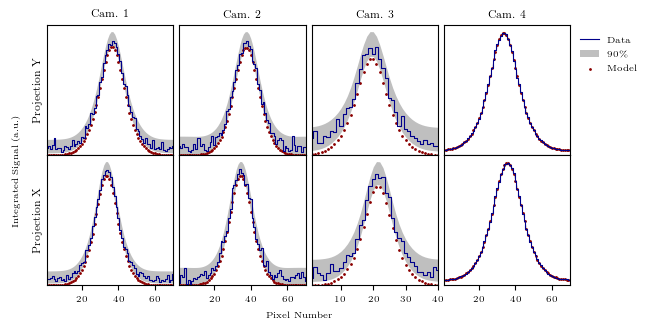

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


In [38]:
plot_projections_prl(conv_matrices, event, event, mean(samples)[1],
    isnontr = true, 
    figsize=(2*3.375, 3.375),
    saveplot = true,
    filename = "../../plots-prl/proj-toy.pdf"
)

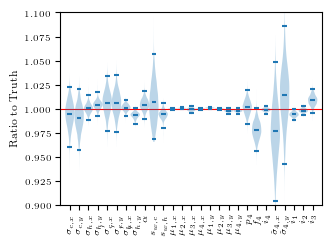

In [42]:
fig, ax = plt.subplots(1,1, figsize=(3.375, 2.5))

ax.axhline(1.0, linestyle="-", lw=0.8, color="red", alpha=1.0, zorder=0, label="Truth")

parts = ax.violinplot(data[ind_sorted], widths = 1.0, vert=true, showmeans=true, showextrema=false, quantiles=quant[ind_sorted])

# for pc in parts["bodies"]
#     pc.set_facecolor("gray")
#     pc.set_edgecolor("black")
#     pc.set_alpha(0.5)
#     pc.set_linewidth(2)
# end

ax.set_xlim(0.0, length(data)+1)

ax.set_xticks(collect(Base.OneTo(length(data))))
ax.set_xticklabels(labels, rotation = 90, ha="center")
# ax.legend(loc="upper left")
ax.set_ylabel("Ratio to Truth")

ax.set_ylim(0.9, 1.1)

fig.savefig("../../plots-prl/toy-violin-2.pdf", bbox_inches = "tight")